In [139]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy.integrate as sc
import numpy as np
import random 

In [17]:
#create graph
G=nx.erdos_renyi_graph(100,0.1)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 100
Number of edges: 475
Average degree:   9.5000


In [123]:
#define parameters
beta=1.2
mu=0.2
i=(6/len(G))
Initial_infected=(i,1-i)
tmax=20


In [124]:
def SIS_model(Initial_infected,time):
    di=np.zeros((2))
    #Calculate the infected DE
    di[0]=(beta*Initial_infected[1]*Initial_infected[0])-(mu*Initial_infected[0])
    #Calculate the susciptible DE
    di[1]=(-beta*Initial_infected[1]*Initial_infected[0])+(mu*Initial_infected[0])
    return di

    

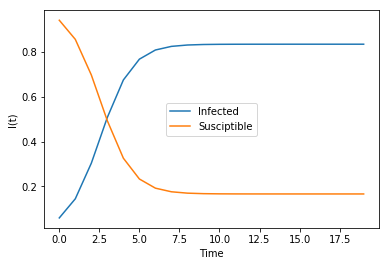

In [180]:
i=sc.odeint(SIS_model,Initial_infected,range(0,tmax))
plt.plot(range(0,tmax),i[:,0],label='Infected')
plt.plot(range(0,tmax),i[:,1],label='Susciptible')
plt.legend(loc='center')
plt.xlabel('Time')
plt.ylabel('I(t)')
plt.show()

In [162]:
lambda_max=20
lambda_vals=list(np.linspace(0.0,1.0,20))
lambda_vals=[round(lambda_vals[i],2) for i in range(0,20)]
lambda_vals.sort()
#lambda_vals

In [166]:
#random graph
mu=0.2
i=0.06
def Spreading_rate(lambda_val):
    di=(mu*lambda_val*(1-i)*i)-(mu*i)
    return di

[0.0, 0.05, 0.11, 0.16, 0.21, 0.26, 0.32, 0.37, 0.42, 0.47, 0.53, 0.58, 0.63, 0.68, 0.74, 0.79, 0.84, 0.89, 0.95, 1.0]
[None, None, None, None, None, None, None, None, None, None, 0.53, 0.58, 0.63, 0.68, 0.74, 0.79, 0.84, 0.89, 0.95, 1.0]
[0.0, 0.0, 0.01, 0.03, 0.04, 0.07, 0.1, 0.14, 0.18, 0.22, 0.28, 0.34, 0.4, 0.46, 0.55, 0.62, 0.71, 0.79, 0.9, 1.0]


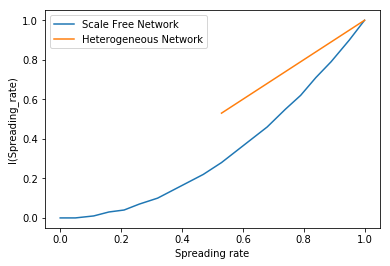

In [192]:
#scale free graph given power law exponent between 2 and 3
i_random=[]
for i in range(0,20):
    temp=sc.odeint(Spreading_rate,lambda_vals[i],1)
    
    i_random.append(temp.item(0))
print(i_random)
i_random_final=[]
for i in range(0,len(i_random)):
    if i_random[i]>0.5:
        i_random_final.append(i_random[i])
    else:
        i_random_final.append(None)
print(i_random_final)

i_lambda=[round(lambda_vals[i]**(1/(3-2.5)),2) for i in range(0,lambda_max)]
print(i_lambda)

plt.plot(lambda_vals,i_lambda,label='Scale Free Network')
plt.plot(lambda_vals,i_random_final,label='Heterogeneous Network')

plt.legend(loc='upper left')
plt.xlabel('Spreading rate')
plt.ylabel('I(Spreading_rate)')
plt.show()

1. I have used Integration technique for Differential equation of the SIS mode to get the average number of infected nodes.
2. I have used the equation given in the textbook about the scale free graph to find the infected nodes for given spreading rate. i(lambda)=lambda^(1/(3-powerlaw_exponent)). Secondly I have assumed beta to be 0.5 to get the plot for random graph.